In [0]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import nltk

In [0]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return fig, ax

def get_metrics(test_labels, predicted_labels):
    
    print('Accuracy:', np.round(
                        metrics.accuracy_score(test_labels, 
                                               predicted_labels),
                        4))
    print('Precision:', np.round(
                        metrics.precision_score(test_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('Recall:', np.round(
                        metrics.recall_score(test_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
    print('F1 Score:', np.round(
                        metrics.f1_score(test_labels, 
                                               predicted_labels,
                                               average='weighted'),
                        4))
                            
def display_classification_report(test_labels, predicted_labels, classes):

    report = metrics.classification_report(y_true=test_labels, y_pred=predicted_labels) 
    print(report)
    
      
def display_model_performance_metrics(classifier,x_data,test_labels, classes):
    predicted_labels = classifier.predict(x_data)
    print('Model Performance metrics:')
    print('-'*30)
    get_metrics(test_labels, predicted_labels)
    print('\nModel Classification report:')
    print('-'*30)
    display_classification_report(test_labels, predicted_labels,classes)
    fig, ax = plot_confusion_matrix(test_labels, predicted_labels, classes, normalize=True)
    fig.set_size_inches(18.5, 10.5)

In [0]:
df = pd.read_csv('/content/drive/My Drive/Emotion-Detection/dataset_final_preprocessed.csv')

In [0]:
data_classes = list(df['Emotion'].unique())
data_classes = np.array(data_classes)
data_classes

array(['Happy', 'Sad', 'Fear', 'Anger', 'Bad', 'Surprise', 'Digust'],
      dtype='<U8')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
cv = CountVectorizer()
x_data = cv.fit_transform(df['Text'].values.astype('U'))

In [0]:
y_data = df['Emotion'].values.astype('U')

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.20, random_state=42)

In [0]:
from sklearn.linear_model import SGDClassifier 
clf = SGDClassifier(loss='hinge')
clf.fit(x_train,y_train)
predicted_labels = clf.predict(x_test)

Model Performance metrics:
------------------------------
Accuracy: 0.8486
Precision: 0.8429
Recall: 0.8486
F1 Score: 0.8411

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       Anger       0.72      0.61      0.66      1459
         Bad       0.38      0.18      0.24      1810
      Digust       0.58      0.37      0.45       206
        Fear       0.92      0.88      0.90     12716
       Happy       0.71      0.90      0.80      7672
         Sad       0.92      0.92      0.92     16902
    Surprise       0.62      0.39      0.48       844

    accuracy                           0.85     41609
   macro avg       0.69      0.61      0.64     41609
weighted avg       0.84      0.85      0.84     41609

Normalized confusion matrix


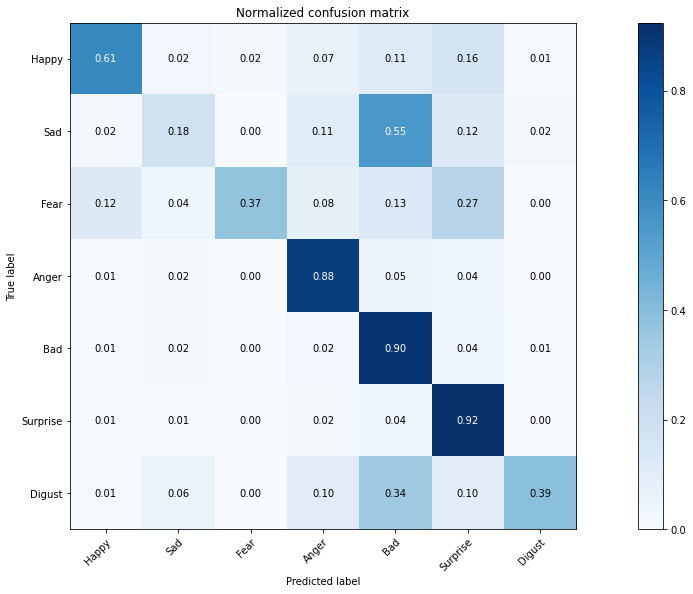

In [0]:
import sys
sys.path.insert(1, '/content/drive/My Drive/Emotion-Detection')
data_classes = np.array(list(df['Emotion'].unique()))
import eval
eval.display_model_performance_metrics(model,x_test,y_test, data_classes,True,'lstm_confusion_matrix',True)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Performance metrics:
------------------------------
Accuracy: 0.8488
Precision: 0.8477
Recall: 0.8488
F1 Score: 0.8469

Model Classification report:
------------------------------
              precision    recall  f1-score   support

       Anger       0.75      0.62      0.68      1459
         Bad       0.39      0.40      0.40      1810
      Digust       0.57      0.35      0.44       206
        Fear       0.91      0.88      0.89     12716
       Happy       0.78      0.85      0.81      7672
         Sad       0.90      0.93      0.91     16902
    Surprise       0.60      0.38      0.46       844

    accuracy                           0.85     41609
   macro avg       0.70      0.63      0.66     41609
weighted avg       0.85      0.85      0.85     41609

Normalized confusion matrix


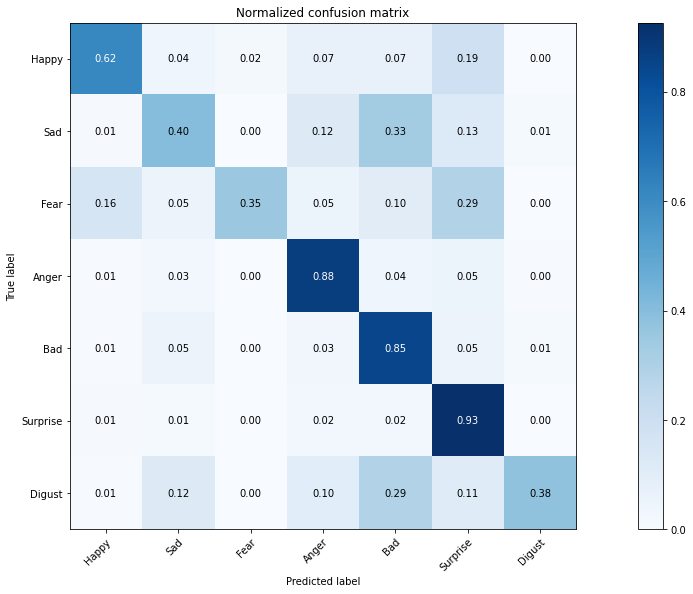

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty='l2', C=1)
lr.fit(x_train,y_train)
display_model_performance_metrics(lr,x_test,y_test, data_classes)

Model Performance metrics:
------------------------------
Accuracy: 0.7892
Precision: 0.7725
Recall: 0.7892


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 Score: 0.7636

Model Classification report:
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Anger       0.80      0.24      0.37      1459
         Bad       0.38      0.11      0.17      1810
      Digust       0.00      0.00      0.00       206
        Fear       0.85      0.85      0.85     12716
       Happy       0.79      0.74      0.76      7672
         Sad       0.77      0.94      0.84     16902
    Surprise       0.67      0.07      0.12       844

    accuracy                           0.79     41609
   macro avg       0.61      0.42      0.44     41609
weighted avg       0.77      0.79      0.76     41609

Normalized confusion matrix


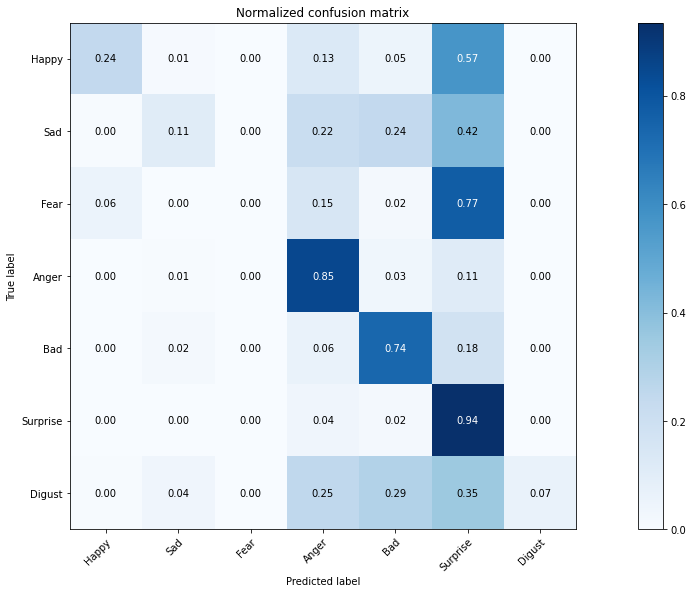

In [0]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train,y_train)
display_model_performance_metrics(clf,x_test,y_test, data_classes)

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

Model Performance metrics:
------------------------------
Accuracy: 0.7225
Precision: 0.7134


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.7225
F1 Score: 0.6791

Model Classification report:
------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       Anger       0.92      0.01      0.02      1459
         Bad       0.00      0.00      0.00      1810
      Digust       0.00      0.00      0.00       206
        Fear       0.85      0.78      0.81     12716
       Happy       0.88      0.51      0.64      7672
         Sad       0.64      0.96      0.77     16902
    Surprise       0.00      0.00      0.00       844

    accuracy                           0.72     41609
   macro avg       0.47      0.32      0.32     41609
weighted avg       0.71      0.72      0.68     41609

Normalized confusion matrix


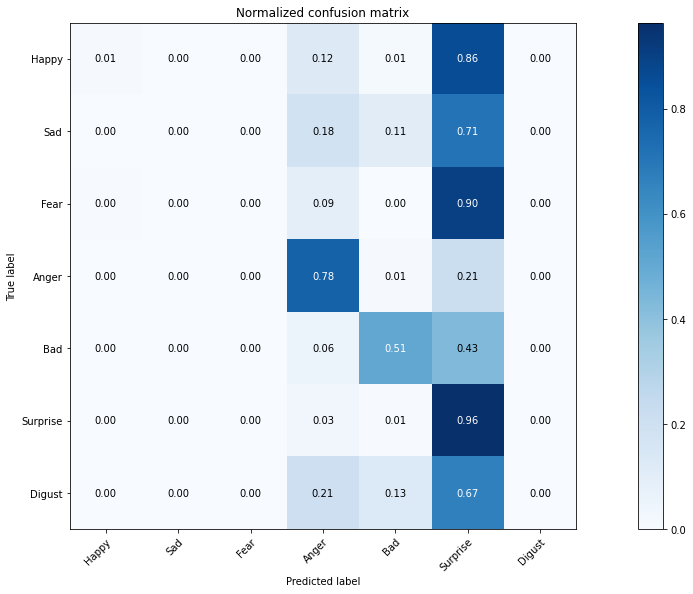

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['Text'].values.astype('U'), df['Emotion'].values, test_size=0.20, random_state=42)
clf.fit(x_train,y_train)
display_model_performance_metrics(clf,x_test,y_test, data_classes)